# FRE6091_Albert_Lee_HW3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Assume you have nine people whose heights are  (" = inches)

60" 62" 64" 66" 68" 70" 72" 74" 76"

In [3]:
height1 = np.arange(60, 77, 2)
print('height:', height1)

height: [60 62 64 66 68 70 72 74 76]


And assume the true model for weight is 

$Weight = 140lbs + 5(lbs / inch) ( height - 68" ) + error,~~error$~$N(0,~(25lb)^2)$

## **Step 1 :**

Generate a data set using our 9 heights and our formula for the weights. Don't forget the random error in each person's weight.

In [4]:
seed = 87
np.random.seed(seed)
weight1_woe = 140 + 5 * (height1 - 68)
weight1 = weight1_woe + np.random.normal(loc=0, scale=25, size=height1.shape)
print('Weight:', weight1)
#np.mean(weight)

Weight: [109.30938802 113.19788861 133.18030652 120.73067746 183.76108618
 159.47552227 164.67659369 187.00933986 149.38723826]


#### a. Find your regression line

#### $\hat{y}=b_{0}+b_{1}x$  
#### $\epsilon=y-\hat{y}$  
#### $\epsilon=y-b_{0}-b_{1}x$  
#### $\epsilon^2=(y-b_{0}-b_{1}x)^2$  
#### $S=\Sigma^n_{i=1}\epsilon^2_{i}=\Sigma^n_{i=1}[(y_{i}-b_{0}-b_{1}x_{i})^2]$  
#### $\frac{\partial S}{\partial b_{0}}=\Sigma^n_{i=1}2(y_{i}-b_{0}-b_{1}x_{i})(-1)=0$  
#### $b_{0}=\frac{1}{n}\Sigma^n_{i=1}y_{i}-b_{1}\frac{1}{n}\Sigma^n_{i=1}x_{i}=\bar{y}-b_{1}\bar{x}$  
#### $\frac{\partial S}{\partial b_{1}}=\Sigma^n_{i=1}2(y_{i}-\bar{y}+b_{1}\bar{x}-b_{1}x_{i})(\bar{x}-x_{i})=0$  
#### $~~~~~=\Sigma^n_{i=1}(-1)(y_{i}-\bar{y})(x_{i}-\bar{x})+b_{1}\Sigma^n_{i=1}(x_{i}-\bar{x})^2=0$  
#### $b_{1}\frac{1}{n}\Sigma^n_{i=1}(x_{i}-\bar{x})^2=\frac{1}{n}\Sigma^n_{i=1}(y_{i}-\bar{y})(x_{i}-\bar{x})$  
#### $b_{1}=\frac{Cov(X, Y)}{Var(X)}=\rho\frac{s_{y}}{s_{x}}$  
#### $b_{0}=\bar{y}-\rho\frac{s_{y}}{s_{x}}\bar{x}$

In [5]:
x1 = height1 - 68
cov1 = np.cov(x1, weight1, bias=False)
print('Covariance Matrix:')
print(cov1)

Covariance Matrix:
[[ 30.         120.87079346]
 [120.87079346 858.69711582]]


In [6]:
b1 = cov1[0, 1] / cov1[0, 0] 
print('b1=', b1)
#print(np.mean(x1))
b0 = np.mean(weight1)# - b1 * np.mean(x1) 
print('b0=', b0)

b1= 4.029026448587946
b0= 146.74756009778625


**Regression Line 1**  
  
$E[weight] = 5(lbs / inch)(height - 68'') + 146.75~lbs$

In [7]:
yhat1 = b1 * x1 + b0
print(yhat1)

[114.51534851 122.57340141 130.6314543  138.6895072  146.7475601
 154.80561299 162.86366589 170.92171879 178.97977169]


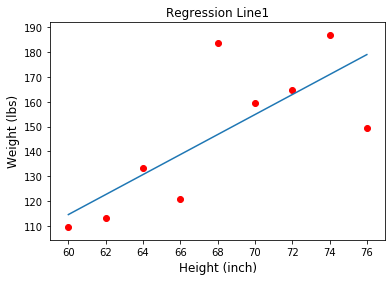

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(height1, yhat1)
plt.scatter(height1, weight1, color='red')
plt.xlabel('Height (inch)', fontsize=12)
plt.ylabel('Weight (lbs)', fontsize=12)
plt.title('Regression Line1')
plt.show()

## Step 2 :

#### Repeat Step 1, 1000 times.  

In [9]:
onemat = np.ones((1000, 9))

In [10]:
height = onemat * height1
#print(height)

In [11]:
error = np.random.normal(loc=0, scale=25, size=(1000, 9))
#print(error)

In [12]:
weight = 140 + 5 * (height - 68) + error
#print(weight)

In [13]:
x = height - 68
#print(x.shape)
cov_all = np.zeros((1000,))

for i in range(len(cov_all)):
    cov_all[i] = np.cov(x[i], weight[i], bias=False)[0, 1]
    var_x = np.cov(x[i], weight[i], bias=False)[0, 0]
#print(cov_all)

In [14]:
b1_1 = cov_all / var_x
#print(b1)
b0_1 = np.mean(weight, axis=1)# - b1 * np.mean(x, axis=1)
#print(b0)

#### a. Make a histograms of your 1000 slopes : Is it centered around the true slope?  

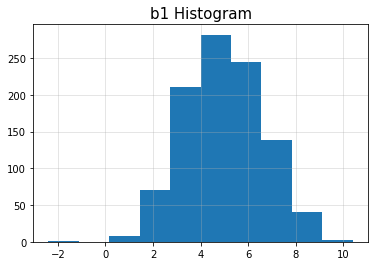

In [15]:
plt.hist(b1_1)
plt.title('b1 Histogram', fontsize=15)
plt.grid(True, alpha=0.4)

**Answer:** Yes, the distribution of slopes is centered around the true slope 5

#### b. Make a histograms of  your 1000 intercepts (mean y) : Is it centered around 140lbs?  

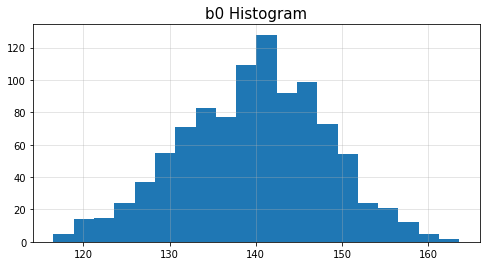

In [16]:
plt.figure(figsize=(8, 4));
plt.hist(b0_1, bins=20);
plt.title('b0 Histogram', fontsize=15)
plt.grid(True, alpha=0.4)

**Answer:** Yes, The distribution of intersepts is centered around 140lbs

#### c. Are your slopes and intercepts correlated?

$Cov(b_{0}, b_{1})=E[(b_{0}-\bar{b_{0}})(b_{1}-\bar{b_{1}})]$  
$~~~~~~~~~~~~~~~~~=\frac{1}{1000-1}\Sigma_{i=1}^{1000}(b_{0}^{(i)}-\bar{b_{0}})(b_{1}^{(i)}-\bar{b_{1}})$
  
$\rho_{b_{0},b_{1}}=Cov(b_{0}, b_{1})/(\sqrt{Var[b_{0}]}\sqrt{Var[b_{1}}])$

In [19]:
print(np.cov(b0_1.T, b1_1.T))
print("")
print(np.corrcoef(b0_1.T, b1_1.T))
print("")

cov = (1 / (len(b0_1) - 1)) * sum((b0_1 - np.mean(b0_1)) * (b1_1 - np.mean(b1_1)))
print("Cov[b0, b1] =", cov)

corr = np.sqrt(cov)
print("Corr[b0, b1]=", corr)

[[70.83518232  0.59945765]
 [ 0.59945765  2.70505362]]

[[1.        0.0433058]
 [0.0433058 1.       ]]

Cov[b0, b1] = 0.5994576480933811
Corr[b0, b1]= 0.7742465034427867


**Answer:** NO!!!, b0, b1 are positively correlated.

In [17]:
b0_1 = b0_1[:, np.newaxis]
b1_1 = b1_1[:, np.newaxis]

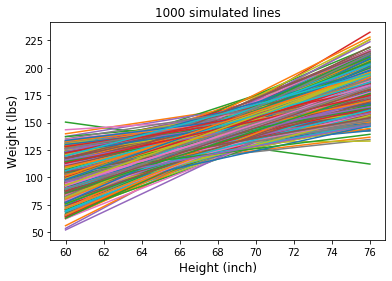

In [18]:
yhat = b0_1 * np.ones((1000, 9)) + b1_1 * np.ones((1000, 9)) * (height - 68)
#print(yhat.shape)
#print(height.shape)
plt.figure(figsize=(6, 4))
for i in range(len(yhat)):
    plt.plot(height[i, :], yhat[i, :])
plt.title('1000 simulated lines')
plt.xlabel('Height (inch)', fontsize=12)
plt.ylabel('Weight (lbs)', fontsize=12)
plt.show()

## Step 3 :

#### Combine step 1 and step 2

#### Using our error formulas we can build a 95% confidence interval for our estimate of the height of all people who are 72".  This would be using only the information from step 1.  Are 95% of our observations in step 2 inside this interval?

In [19]:
residual1 = weight1 - yhat1
a = np.sqrt(sum((residual1**2)) / (9 - 2)) 
#print(a)
b = a / np.sqrt(len(residual1))
#print(b)
c = a / (np.sqrt(len(residual1) - 1) * np.std(height1, ddof=1)) * (height1[-3] - 68)
#print(c)

In [20]:
Interval = (yhat1[-3] - 2.306 * np.sqrt(a**2 + b**2 + c**2), yhat1[-3] + 2.306 * np.sqrt(a**2 + b**2 + c**2) )

In [21]:
print('95% C.I. of Weight (lbs) for 72 inch:', Interval)

95% C.I. of Weight (lbs) for 72 inch: (111.2830595128597, 214.4442722714164)


In [22]:
includedI = sum(np.logical_and(weight[:,-3] > Interval[0], weight[:,-3] < Interval[1]))
totalnum = len(weight[:,-3])

In [23]:
print('Checking with 1000 observations in step 2:', round((includedI / totalnum) * 100, 2), "%")

Checking with 1000 observations in step 2: 96.4 %


**Answer:**  
Yes, approxmately 95% of 1000 observations are within the interval